# 신경망

가중치 매개변수의 적절한 값을 데이터에서 자동으로 학습하는 능력이 신경망의 중요한 성질이다.  
신경망의 개요, 신경망이 입력 데이터가 무엇인지 식별하는 처리 과정을 알아보자.

## 퍼셉트론에서 신경망으로
퍼셉트론과 다른 점으로 신경망 구조를 살펴보자.  

### 신경망의 예
신경망 그림을 참고한다.  
![NeuralNet.png](./image/NeuralNet.png)
가장 왼쪽 줄을 입력층, 가장 오른쪽 줄을 출력층, 중간 줄을 은닉층이라 한다.  
은닉층의 뉴런은 사람 눈에 보이지 않는다. 0층이 입력층, 1층이 은닉층, 2층이 출력층이 된다.  
가중치를 갖는 층이 2개이므로 2층 신경망이라 하며, 문헌에 따라 3층 신경망이라고도 한다.

### 퍼셉트론 복습
![perceptron](./image/perceptron.png)

이 퍼셉트론을 수식으로 나타내면 다음과 같다.  
$$y =
\begin{cases}
0 & \mbox{}(b+w_1x_1+w_2x_2) \le\mbox{0} \\
1 & \mbox{}(b+w_1x_1+w_2x_2)>\mbox{0 }
\end{cases} $$

$b$는 편향을 나타내는 매개변수 : 뉴런이 얼마나 쉽게 활성화되는지 제어
$w_1, w_2$ 각 신호의 가중치를 나타내는 매개변수 : 각 신호의 영향력 제어. 

편향을 명시한 퍼셉트론은 다음과 같다.
![percep](./image/percep2.png)

가중치가 b이고 입력이 1인 뉴런을 추가했다. 그러면 3개의 신호가 뉴런에 입력되고, 신호에 가중치를 곱해서 다음 뉴런에 전달 된다.  
다음 뉴런은 이 신호의 값을 더해서 총 합이 0을 넘으면 1을 출력하고 아니면 0을 출력한다.  
편향의 입력 신호는 항상 1이므로 회색으로 구분한다.  
더 간결하게 작성애보면 다음과 같은 식으로 작성한다. 여기서 조건 분기의 동작을 하나의 함수 $h(x)$로 표현한다.  
$$y = h(b + w_1x_1 + w_2x_2)$$

$$h(x) =
\begin{cases}
0 & \mbox{} (x \le\mbox{0}) \\
1 & \mbox{} (x >\mbox{0})
\end{cases}$$

결과적으로 퍼셉트론의 식과 위의 식은 동일하다고 볼 수 있다.

### 활성화 함수의 등장
* 활성화 함수 : $h(x)$처럼 입력 신호의 총합을 출력 신호로 변환하는 함수  
입력 신호의 총합이 활성화를 일으키는지 정한다.  
2단계로 다시 분리한다. 입력 신호의 총합을 계산하고, 그 합을 활성화 함수에 입력해 결과를 낸다.  
$$a = b+w_1x_1 + w_2x_2$$입력신호와 편향의 총합을 계산해서 $a$라고 한다.
$$y = h(a)$$  $a$를 함수 $h()$에 넣어 $y$를 출력한다.  

* 활성화 함수의 처리 과정은 다음과 같다.
![image](./image/active.png)

뉴런과 노드는 같은 의미로 사용한다. 신경망 동작을 명확히 하고자 활성화 과정을 명시했다.  
$a$ : 입력 신호의 총합  
$h()$ : 활성화 함수  
$y$ : 출력

## 활성화 함수
* 계단 함수(step function) : 임계값을 경계로 출력이 바뀌는 활성화 함수.  
"퍼셉트론에서는 활성화 함수로 계단 함수를 이용한다."  
활성화 함수로 계단 함수에서 다른 함수로 변경하는 것이 신경의 열쇠이다.

### 시그모이드 함수
시그모이드 함수(sigmoid function)
$$h(x) = {1 \over {1+\exp(-x)}}$$  
시그모이드는 단순한 함수로 변환기이다. 시그모이드 함수로 신호를 변환하고, 변환된 신호를 다음 뉴런에 전달한다.  
퍼셉트론과 신경망의 차이가 이 활성화 함수이다.

In [2]:
#계단함수 구현하기
def step_function(x):#넘파이 배열은 인수로 넣지 못한다.
    if x >0:
        return 1
    else:
        return 0

In [4]:
#넘파이 배열도 가능하게 하자.
def step_function(x):
    y = x>0
    return y.astype(np.int)

In [5]:
import numpy as np
x = np.array([-1.0, 1.0, 2.0])
x

array([-1.,  1.,  2.])

In [8]:
y = x > 0 # 넘파이 배열에 부등호 연산 수행하면, 배열의 원소 각각 부등호 연산에 bool 배열이 나온다. 0 보다 크면 true, 나머지 false 출력한다.

In [9]:
y

array([False,  True,  True])

In [12]:
y = y.astype(np.int) # 자동 형변환을 해줄 수 있다. 계단 함수는 0이나 1의 int형을 출력하기 때문이다.
y # 좋은 넘파이의 트릭이다. astype() 메서드 활용하자!

array([0, 1, 1])

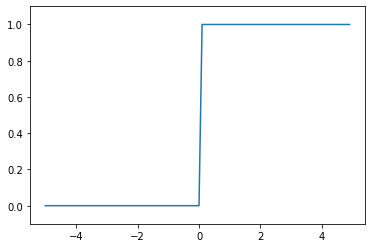

In [16]:
# 계단 함수의 그래프
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x >0, dtype = np.int)

x = np.arange(-5.0, 5.0, 0.1) #-5 부터 5까지 0.1 간격으로 넘파이 배열 생성
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y축 범위
plt.show()

In [18]:
# 시그모이드 함수 구현하기
def sigmoid(x):
    return 1 / (1 + np.exp(-x)) # 인수 x가 넘파이 배열이라도 올바른 결과 나온다. 기억!

In [20]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x) # 넘파이의 브로드 캐스트 덕분에 넘파이 배열도 가능한 것이다.

array([0.26894142, 0.73105858, 0.88079708])

In [21]:
t = np.array([1.0, 2.0, 3.0])
1.0 + t

array([2., 3., 4.])

In [23]:
1.0 / t #스칼라 값과 넘파이 배열이 계산이 가능하다. sigmoid도 가능한 이유!

array([1.        , 0.5       , 0.33333333])

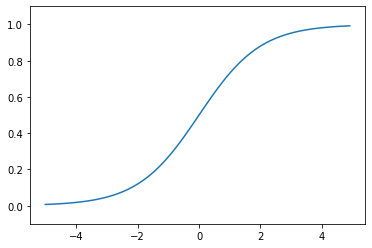

In [25]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.show() #시그모이드 = S자 모양만 기억하라!!

### 시그모이드 함수와 계단 함수 비교
1. 매끄러움의 차이  
시그모이드는 부드러운 곡선이고 입력에 따른 출력이 **연속적**으로 변화. 
계단 함수는 0을 경계로 출력이 갑자기 변화한다. 시그모이드의 매끈함이 신경망에서 아주 중요하다.  
2. 출력 값의 차이  
계단 함수는 0과 1 중 하나의 값만 출력하고, 시그모이드는 실수를 돌려준다. 신경망에서는 연속적인 실수가 흐른다.  

3. 공통점  
큰 관점에서는 둘은 같은 모양을 한다. 입력이 작을 때의 출력이 0에 가깝거나 0이고, 입력이 커지면 출력이 1에 가깝거나 1이 되는 구조이다.  
입력이 중요하면 큰 값을 출력하고, 입력이 중요하지 않으면 작은 값을 출력한다.  
입력이 아무리 작거나 커도 0에서 1 사이 출력을 낸다.


### 비선형 함수
공통점으로 두 함수모두 **비선형 함수**이다.  
선형 함수 : 변환기에 입력 시 출력이 입력의 상수배만 가능.  
비선형 함수 : 선형이 아닌 함수.  
신경망에서는 활성화 함수로 비선형 함수를 사용해야 한다.  
선형 함수를 이용하면 신경망의 층을 깊게 하는 의미가 없어진다.  
$$h(x) = cx \\
y(x) = h(h(h(x))) \\
y(x) = c * c * c * x \\
y(x) = ax \\
a = c^3$$  
결국 동일한 선형 함수가 된다. 은닉층 없는 네트워크이다. 층을 쌓는 혜택을 얻으려면 **비선형 함수**를 반드시 써라!
> 비선형 함수가 층을 쌓는 의미를 가지는 이유?

### ReLu 함수(Rectified Linear Unit) 
최근에는 이 ReLu 함수를 주로 이용한다.  
입력이 0을 넘으면 그 입력을 그대로 출력하고, 0 이하이면 0을 출력하는 함수로 다음과 같다.
$$h(x) =
\begin{cases}
x & \mbox{} (x >\mbox{0}) \\
0 & \mbox{} (x \le\mbox{0})
\end{cases}$$

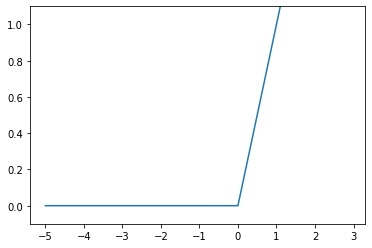

In [31]:
def relu(x):
    return np.maximum(0, x) #maximum은 두 입력 값 중 큰 값을 선택해 반환하는 함수이다.
x = np.arange(-5.0, 3.0, 0.1)
y = relu(x)
plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.show() #시그모이드 = S자 모양만 기억하라!!


## 다차원 배열의 계산
### 다차원 배열
신경망을 효율적으로 구현한다. 기본은 '숫자의 집합'이다. N차원으로 숫자를 나열하는 것을 통틀어 다차원 배열이라 한다.

In [38]:
import numpy as np
# 1차원 배열
A = np.array([1,2,3,4])
print(A)

[1 2 3 4]


In [39]:
np.ndim(A) #넘파이 차원을 확인한다.

1

In [40]:
A.shape # 배열의 형상을 인스턴스 변수인 shape으로 본다. 배열의 원소 크기 보여준다. 튜플로 변환하는 것을 주의하라!!! 다차원 배열에서 모두 통일된 형태로 반환하기 위함이다.

(4,)

In [41]:
A.shape[0]

4

In [42]:
# 2차원 배열
B = np.array([[1,2], [3,4], [5,6]])
print(B)

[[1 2]
 [3 4]
 [5 6]]


In [43]:
np.ndim(B)

2

In [44]:
B.shape

(3, 2)

B는 $3 \times 2$ 인 배열로,처음 차원은 원소가 3개이고 다음 차원은 원소가 2개라는 의미이다.  
2차원 배열은 **행렬 matrix**라고 부르고, 가로 방향을 행 row, 세로 방향을 열 column이라고 한다.  
$\pmatrix {1\ 2 \\
3\ 4\\
5\ 6}$

### 행렬의 곱


In [45]:
A = np.array([[1,2], [3,4]])
A.shape

(2, 2)

In [46]:
B = np.array([[5,6], [7,9]])
B.shape

(2, 2)

In [48]:
np.dot(A, B) #두 행렬의 곱은 넘파이 함수 np.dot()을 이용!  1차원 배열 입력은 벡터, 2차원 배열은 행렬 곱을 계산한다. 교환법칙 성립하지 않는다.

array([[19, 24],
       [43, 54]])

In [51]:
# 형상이 다른 경우 행렬의 곱
A = np.array([[1,2,3], [4,5,6]])
A.shape

(2, 3)

In [52]:
B = np.array([[1,2],[3,4],[5,6]])
B.shape

(3, 2)

In [53]:
np.dot(A, B)

array([[22, 28],
       [49, 64]])

In [54]:
C = np.array([[1,2],[3,4]])
C.shape

(2, 2)

In [55]:
A.shape

(2, 3)

In [57]:
np.dot(A, C) #A의 1번째 차원과 C의 0번째 차원이 다르면 오류가 난다.(차원의 인덱스는 0부터 시작한다.) 

ValueError: shapes (2,3) and (2,2) not aligned: 3 (dim 1) != 2 (dim 0)

대응하는 차원의 원소 수를 일치시켜라!!  

In [58]:
A = np.array([[1,2],[3,4],[5,6]])
A.shape

(3, 2)

In [61]:
B = np.array([7,8])
B.shape

(2,)

In [62]:
np.dot(A, B)

array([23, 53, 83])

### 신경망에서의 행렬 곱
넘파이 행렬로 신경망을 구현하자. 편향과 활성화 함수를 생략하고 가중치만 가정한다.  
주의할 점은 X와 W의 대응하는 차원의 원소 수가 같아야 한다.

In [63]:
X = np.array([1,2])
X.shape

(2,)

In [64]:
W = np.array([[1,3,5], [2,4,6]])
W.shape

(2, 3)

In [66]:
y = np.dot(X, W) # np.dot() 으로 아무리 Y 원소가 커도 한 번의 연산으로 계산한다!! 행렬의 곱으로 한꺼번에 계산해주는 기능이 신경망에서 매우 중요하다.
print(y)

[ 5 11 17]


## 3층 신경망 구현하기
넘파이 배열로 신경망의 순방향 처리 완성할 수 있다.
### 표기법 설명
$w_{12}^{(1)}$ : 앞 층의 2번째 뉴런($x_2$)에서 다음 층의 1번째 뉴런($a_1^{(1)}$)으로 향할 때 가중치이다.  
하단 인덱스 번호는 **다음 층 번호, 앞 층 번호 순**으로 적는다.

In [67]:
#행렬의 곱으로 구현하기
X = np.array([1.0, 0.5]) # (2,)
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]]) # (2,3)
B1 = np.array([0.1, 0.2, 0.3]) # (3,)

A1 = np.dot(X, W1) + B1

In [69]:
# 은닉층에서 가중치 합을 a로 표기, 활성화 함수 h() 변환된 신호를 z로 표기
# 시그모이드로 표현한다.
Z1 = sigmoid(A1) # 앞에서 정의

print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [71]:
#1층에서 2층으로 가는 과정
W2 = np.array([[0.1, 0.4], [0.2, 0.3], [0.3, 0.6]]) #(3,2)
B2 = np.array([0.1, 0.2]) #(2,)

A2 = np.dot(Z1, W2) # 1*3 * 3*2 = 1*2 (2,)
Z2 = sigmoid(A2)
print(Z2) #Z1이 2층의 입력이 된다.

[0.60256397 0.70690291]


In [74]:
def identity_function(x): #항등함수 정의하고, 이를 출력층의 활성화 함수로 이용한다.
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3) # Y= A3 출력층의 함수로 그림에서는 시그마 함수로 표기한다.

In [77]:
# 구현 정리
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]]) # (2,3)
    network['b1'] = np.array([0.1, 0.2, 0.3]) #(3,)
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]]) #(3,2)
    network['b2'] = np.array([0.1, 0.2]) #(2,)
    network['W3'] = np.array([[0.1,0.3], [0.2, 0.4]]) #(2,2)
    network['b3'] = np.array([0.1, 0.2]) #(2,)
    
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

network = init_network() # 가중치와 편향을 초기화하고 이를 딕셔너리 변수인 network에 저장한다. 여기에 각 층에 필요한 매개변수 저장한다.
x = np.array([1.0, 0.5])
y = forward(network, x) #입력신호를 출력으로 변환하는 처리 과정 구현한다. 신호가 순방향으로 전달됨(순전파) 표기한 이름이다.
print(y) #[0.31682708 0.69627909]
# 넘파이 다차원 배열 쓰면 효율적으로 신경망 구현이 가능하다!

[0.31682708 0.69627909]


## 출력층 설계하기
신경망은 분류와 회귀 모두 이용한다. 활성화 함수가 다르다. 일반적으로 회귀는 항등함수를 쓰고 분류는 소프트맥스함수를 쓴다.
### 항등 함수와 소프트맥스 함수 구현하기
* 항등 함수(identity function) : 입력을 그대로 출력한다. 입력과 출력이 항상 같다.
* 소프트맥스 함수(softmax function)
$$y_k = {\exp(a_k) \over \sum_{i=1}^n \exp(a_i)}$$
n은 출력 층의 뉴런 수이고, $y_k$는 k번째 출력임을 뜻한다. 분자는 입력 신호의 지수 함수이고, 분모는 모든 입력 신호의 지수 함수의 합이다.  
소프트맥스는 분모에서 보듯이 출력층의 각 뉴런이 모든 입력 신호에서 영향을 받는다.

In [78]:
a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a)
print(exp_a)

[ 1.34985881 18.17414537 54.59815003]


In [79]:
sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

74.1221542101633


In [80]:
y = exp_a / sum_exp_a
print(y)

[0.01821127 0.24519181 0.73659691]


In [81]:
# 함수로 만든다.
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

### 소프트맥스 함수 구현시 주의점
오버플로 문제. 
지수 함수를 사용해서 쉽게 큰 값을 내므로, 큰 값끼리 나누면 결과가 **불안정**해진다. 해결하려면 다음과 같이 개선한다.  
$$y_k = {\exp(a_k) \over \sum_{i=1}^n \exp(a_i)} =  {C\exp(a_k) \over C\sum_{i=1}^n \exp(a_i)}  \\ =  {\exp(a_k + \log C) \over \sum_{i=1}^n \exp(a_i + \log C)}\\ =  {\exp(a_k + C') \over \sum_{i=1}^n \exp(a_i + C')}  $$  
$C'$ : 오버플로를 막기 위해서는 입력 신호 중 최댓값을 이용한다.



In [82]:
a = np.array([1010, 1000, 900])
np.exp(a) / np.sum(np.exp(a)) # 오버 플로 문제가 발생한다. nan = not a number

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


array([nan, nan, nan])

In [83]:
c = np.max(a)
a - c

array([   0,  -10, -110])

In [84]:
np.exp(a - c) / np.sum(np.exp(a - c))

array([9.99954602e-01, 4.53978687e-05, 1.68883521e-48])

In [85]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(np.exp(a - c))
    y = exp_a / sum_exp_a
    return y

In [88]:
# 소프트맥스 함수의 특징

a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)

[0.01821127 0.24519181 0.73659691]


In [87]:
np.sum(y)

1.0

### 소프트맥스 함수의 특징
1. 소프트맥스 함수의 출력은 0과 1사이이다.
2. 소프트맥스 함수의 출력의 합은 1이다.(중요)  
$\therefore$ 소프트맥스 함수의 출력을 **확률**로 해석할 수 있다.  
소프트맥스 함수를 이용해서 문제를 확률적(통계적)으로 대응한다.  
* 주의  
소프트맥스 함수를 적용해도 각 원소의 대소 관계는 변하지 않는다. $y = \exp(x)$가 단조 증가 함수이기 때문이다.  
* 신경망을 이용한 분류  
일반적으로 가장 큰 출력을 내는 뉴런에 해당 클래스로 인식한다.  
소프트맥스 함수를 적용해도 출력이 가장 큰 뉴런의 위치가 달라지지 않는다.  
출력층의 소프트맥스 함수를 생략해도 된다.  현업에서도 출력층의 소프트맥스 함수는 생략한다.

### 출력층의 뉴런 수 정하기
분류에서는 분류하고 싶은 클래스 수로 설정한다.  
예로, 입력 이미지를 숫자 0부터 9 중 하나로 분류 : 출력층 뉴런 10개. 
* 출력층의 뉴런은 각 숫자에 대응한다.  
회색 농도는 해당 뉴런의 출력 값의 크기를 의미한다. 가장 큰 값이 가장 짙은 뉴런이고, 신경망은 이 뉴런에 해당하는 클래스로 판단한다.

## 손글씨 숫자 인식
신경망의 순전파(forward propagation) : 신경망에서 추론 과정
1. 학습 단계 : 훈련 데이터(학습 데이터)를 통해 가중치 매개변수를 학습
2. 추론 단계 : 앞에서 학습한 매개변수를 이용해서 입력 데이터를 분류

### MNIST 데이터셋
* MNIST:  손글씨 숫자 이미지 집합  
0부터 9까지 숫자 이미지로 구성. 
훈련 이미지 60000장 + 시험 이미지 10000장 준비  

![mnist1](./deep_learning_images/fig_3-24.png)

In [98]:
import sys, os
sys.path.append(os.pardir) #부모 디렉터리 파일을 가져오도록 설정
from dataset.mnist import load_mnist #dataset./mnist.py의 load_mnist 함수 임포트

(x_train, t_train), (x_test, t_test) = load_mnist(flatten = True, normalize = False) # 이제 MNIST 데이터 셋을 호출하고, 인터넷 연결된 상태여야 한다.
# 두번째부터는 로컬에 저장된 pickle 파일로 읽는다.
# load_mnist() 함수는 (훈련 이미지, 훈련 레이블), (시험 이미지, 시험 레이블) 형식으로 반환한다.
#각 데이터 형상 출력 
print(x_train.shape)

(60000, 784)


In [95]:
print(t_train.shape)

(60000,)


In [96]:
print(x_test.shape)

(10000, 784)


In [97]:
print(t_test.shape)

(10000,)


* load_mnist 함수  
인수로 normalize, flatten, one_hot_label 설정 가능하다. 세 인수 모두 bool 값이다.  
normalize : 입력 이미지 픽셀 값을 0.0 ~ 1.0 사이 정규화(False시 0 ~ 255)  
flatten : 입력 이미지를 평탄하게 1차원 배열로 설정(False시 1*28*28)  
one_hot_label : 레이블을 원-핫 인코딩 형태로 저장 설정(False시 7, 2 숫자 형태 레이블 저장)  

In [99]:
#화면으로 부른다. 이미지 표시는 PIL(Python Image Library) 모듈 이용한다.

import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()
    
(x_train, t_train), (x_test, t_test) = load_mnist(flatten = True, normalize = False)
img = x_train[0]
label = t_train[0]
print(label)

5


In [100]:
print(img.shape)

(784,)


In [102]:
img = img.reshape(28, 28) # 원래 이미지 모양인 1*28*28 형태
print(img.shape)

(28, 28)


In [103]:
img_show(img)

![img](./deep_learning_images/fig_3-25.png)

* 주의 사항. 
flatten =True로 읽으면 1차원 넘파이 배열이므로, 실제 이미지 표시할 때는 원래 형상인 28* 28로 다시 변형해야 한다.  
reshape() 메서드를 이용하라.  
PIL용 객체로 변환할 때는 image.fromarray() 메서드를 활용한다.

In [125]:
import pickle
#신경망의 추론 처리
# 입력은 28 * 28 = 784개, 출력은 10개
def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize = True, flatten = True, one_hot_label= False)
    return x_test, t_test

def init_network(): # pickle 파일인 sample_weight.pkl에 저장된 학습된 가중치 매개벼수를 읽는다.
    with open("sample_weight.pkl", 'rb') as f: # 이 파일은 가중치와 편향 매개변수가 딕셔너리 변수로 저장된다.
        network = pickle.load(f)
    return network

def predict(network, x): # 각 레이블의 확률 확률을 넘파이 배열로 반환한다.
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    
    return y

In [127]:
#정확도 평가
x, t = get_data()
network = init_network() #이미 학습된 가중치로 세팅이 된다.

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y) # 확률이 가장 높은 원소의 인덱스를 얻는다.
    if p == t[i]:
        accuracy_cnt += 1 
print("정확도:" + str(float(accuracy_cnt) / len(x)))# 맞힌 숫자의 개수를 세고, 이를 전체 이미지 숫자로 나누어 정확도를 구한다.

정확도:0.9352


* 정규화 normalization : 0 ~ 255 범위인 픽셀 값을 0.0 ~ 1.0 범위로 변환
* 전처리 pre-processing : 신경망의 입력 데이터에 특정 변환을 가하는 것  
$\therefore$ 입력 이미지 데이터에 대한 전처리 작업으로 정규화를 수행  
* 데이터 백색화 whitening : 전체 데이터를 균일하게 분포시킨다.  


In [130]:
# 배치 처리 : 가중치 매개변수의 형상에 주의한다.
x, _  = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

x.shape

(10000, 784)

In [131]:
x[0].shape

(784,)

In [132]:
W1.shape

(784, 50)

In [133]:
W2.shape

(50, 100)

In [134]:
W3.shape

(100, 10)

>x, _  = get_data() ?

이미지 한장 입력 시, 다차원 배열의 대응하는 차원의 원소 수가 일치한다.
![img](./deep_learning_images/fig_3-26.png)

이미지 100장 한꺼번에 입력시, 다음과 같다. 100장 분량 입력 데이터 결과가 한 번에 출력된다.
![img](./deep_learning_images/fig_3-27.png)

예를 들어, x[0]은 0번째 이미지 + y[0]은 그 추론 결과가 저장되는 형식이다.  
* 배치(batch) : 하나로 묶은 입력 데이터, 묶음이란 의미이다.  

> 배치 처리는 컴퓨터 계산시 큰 이점이 있다.  
> 배치 처리로 큰 배열로 이루어진 계산을 한다.  
> 컴퓨터에서는 큰 배열을 한꺼번에 계산하는 것이 분할된 작은 배열을 여러 번 계산하는 것보다 빠르다.

In [140]:
x, t = get_data()
network = init_network()

batch_size = 100 # 배치 크기
accuracy_cnt = 0

for i in range(0, len(x), batch_size): # 0부터 이미지 개수 -1까지 정수로 이루어진 리스트 반환하고, step 간격으로 증가한다.
    x_batch = x[i:i+batch_size] # 100장씩 묶는다. x[0:100], x[100:200], ...
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis = 1) # argmax() 최댓값의 인덱스를 가져온다. axis = 1 주의
    accuracy_cnt += np.sum(p == t[i:i+batch_size]) # p로 얻은 값이 실제 레이블과 일치하는 경우의 합이다.
    
print("정확도:" + str(float(accuracy_cnt) / len(x))) # 올바른 값 / 전체 이미지개수

정확도:0.9352


In [137]:
list( range(0, 10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [139]:
list( range(0, 10, 3))

[0, 3, 6, 9]

In [144]:
#np.argmax(,axis = 1)
x = np.array([[0.1, 0.8, 0.1], [0.3, 0.1, 0.6], [0.2, 0.5, 0.3], [0.8, 0.1, 0.1]])
y = np.argmax(x, axis = 1) # 1번째 차원을 축으로 최댓갑의 인덱스를 찾게 한다.
print(y)

[1 2 1 0]


In [145]:
y1 = np.argmax(x, axis = 0) 
print(y1)

[3 0 1]


> axis = 0 이라면, 왜 저런 답이 나오는가?

    y1 = np.argmax(x, axis = 0) 
    print(y1)
    [3 0 1]

In [148]:
# 배치 단위로 분류한 결과를 실제 답과 비교
y = np.array([1,2,1,0])
t = np.array([1,2,0,0])
print(y==t) # == 연산자로 넘파이 배열끼리 비교하여 bool 배열 제작
# True 개수를 센다.

[ True  True False  True]


In [149]:
np.sum(y==t)

3

$\therefore$ 데이터를 배치 처리하여 효율적이고 빠르게 처리 가능하다.

## 정리
신경망은 매끄러운 시그모이드 함수를 사용하고, 퍼셉트론은 갑자기 변하는 계단 함수를 활성화함수로 사용한다.  
* 신경망에서는 활성화 함수로 시그모이드 함수와 ReLU 함수 같은 매끄럽게 변화하는 함수를 이용한다.
* 넘파이의 다차원 배열을 잘 사용하면 신경망을 효율적으로 구현할 수 있다.
* 기계학습 문제는 크게 회귀와 분류로 나눌 수 있다.
* 출력층의 활성화 함수로는 회귀에서는 주로 항등 함수를, 분류에서는 주로 소프트맥스 함수를 이용한다.
* 분류에서는 출력층의 뉴런 수를 **분류하려는 클래스 수**와 같게 설정한다.
* 입력 데이터를 묶은 것을 배치라 하며, 추론 처리를 이 배치 단위로 진행하면 결과를 훨씬 빠르게 얻을 수 있다.